# Una semplice implementazione di un classificatore binario lineare ("_perceptron_")
Luca Mari, febbraio 2023

Il percettrone (in inglese "_perceptron_") fu proposto come modello matematico di un neurone da McCulloch e Pitts nel 1943 e implementato per la prima volta da Rosenblatt nel 1958 (https://it.wikipedia.org/wiki/Percettrone).

L'esempio di un problema che questo sistema è in grado di risolvere:
* si considerano dei punti nel piano $X,Y$, ognuno caratterizzato dalla sua posizione $x,y$ e dal suo colore, bianco ($1$) o nero ($0$) (secondo una definizione più specifica, anche gli input al percettrone sono binari: non ci preoccupiamo qui di questo);
* sotto l'ipotesi che punti di colori diversi stanno in parti diverse del piano, si vuole indovinare il colore di punti di cui si conosce solo la posizione.

Dunque è un problema di **classificazione**.

La strategia di soluzione è:
1. (**addestramento**) dato un insieme di punti (il _training set_) di cui supponiamo di conoscere anche il colore, addestriamo il neurone a riconoscere che punti in una certa posizione hanno un certo colore, dunque a classificare correttamente;
2. (**funzionamento**) dato un nuovo insieme di punti (il _test set_), di cui è nota la posizione nel piano ma non il colore, chiediamo al neurone addestrato di proporre un'ipotesi sul colore di ognuno di essi (in effetti, conosciamo anche il colore di questi altri punti, ma lo usiamo non per classificarli, ma solo per valutare l'accuratezza della classificazione proposta, calcolata semplicemente come la percentuale dei punti classificati correttamente).

Si tratta dunque di un comportamento -- molto semplice -- da classificatore binario, dato che ogni punto candidato viene classificato in una di due categorie, in funzione della sua posizione.

Costruiamo innanzitutto la classe che modella il neurone (`Perceptron`), dotata di tre metodi per:
* classificare dei punti (`classify`);
* imparare dal risultato di una classificazione, modificando i pesi delle connessioni al neurone (`train`);
* valutare l'affidabilità di una classificazione (`evaluate`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, num_input:int=2, threshold:float=0.5, training_sens:float=0.1):
        """Un semplice percettrone (nessun layer nascosto, classificazione 0 / 1).

        Args:
            num_input (int, opzionale): numero di input al neurone (default: 2)
            threshold (float, opzionale): soglia di classificazione (chiamata anche "bias") (default: 0.5)
            training_sens (float, optional): sensibilità del processo di apprendimento (chiamata anche "learning rate") (default: 0.1)"""
        self.num_input = num_input
        self.threshold = threshold
        self.training_sens = training_sens
        self.weights = np.random.random(size=num_input)


    def classify(self, input:np.ndarray) -> int:
        """Classifica il vettore di input ("forward pass").

        Args:
            input (np.ndarray): vettore da classificare

        Returns:
            int: 0 o 1 come risultato della classificazione"""
        return 1 if np.sum(self.weights * input) >= self.threshold else 0


    def train(self, input:np.ndarray, labels:np.ndarray):
        """Addestra il neurone: processo a un passo ("forward and backward pass").

        Args:
            inputs (np.ndarray): vettore di posizioni
            labels (np.ndarray): vettore di colori (0 o 1)
        """
        for i in range(labels.shape[0]):
            r = self.classify(input[i])               # genera l'etichetta di una classe...
            if r == 0 and labels[i] == 1: self.weights += input[i] * self.training_sens    # ... e quindi correggi i pesi
            if r == 1 and labels[i] == 0: self.weights -= input[i] * self.training_sens    # se il risultato non è corretto


    def evaluate(self, proposed:np.ndarray, true:np.ndarray) -> float:
        """Valuta l'accuratezza percentuale delle classificazioni proposte date le classificazioni corrette.

        Args:
            proposed (np.ndarray): vettore delle etichette proposte
            true (np.ndarray): vettore delle etichette corrette

        Returns:
            float: accuratezza percentuale della classificazione"""
        return 100 * (proposed == true).mean()

Costruiamo ora un _training set_ (assumendo per semplicità che la regola di classificazione sia nota analiticamente, in questo esempio se $x+y \ge 0.5$, bianco; altrimenti nero), e visualizziamolo in uno _scatter diagram_.  
Quindi costruiamo un neurone e addestriamolo con questo insieme di dati.

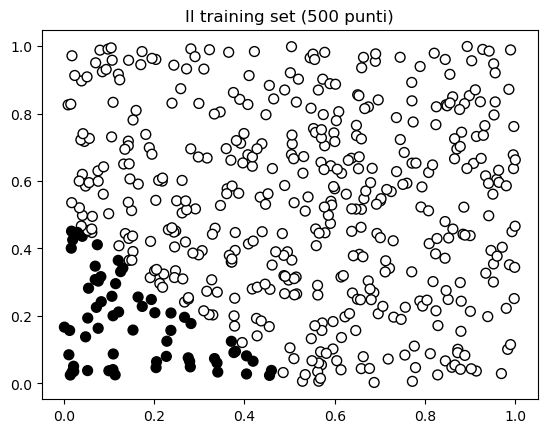

In [2]:
def gen_dataset(size:int=100):
    data = np.random.random(size=(size,2))
    labels = (data[:,0]+data[:,1] >= 0.5).astype(int)
    # ma prova per esempio con
    # labels = (np.sin(np.pi*data[:,0]) >= data[:,1]).astype(int)
    # e i risultati saranno disastrosi...
    return data, labels

training_size = 500        # questo è il parametro critico!
data, labels = gen_dataset(training_size)

plt.figure(1)
plt.clf()
plt.title(f'Il training set ({training_size} punti)')
plt.scatter(data[:,0],data[:,1], s=50, c=labels, edgecolors='black', cmap='gray')
plt.show()

perceptron = Perceptron()
perceptron.train(data, labels)


Infine, costruiamo un _test set_, insieme con le sue etichette, che usiamo per valutare l'accuratezza della classificazione generata dal neurone addestrato (i punti segnati in rosso sono quelli classificati in modo errato).

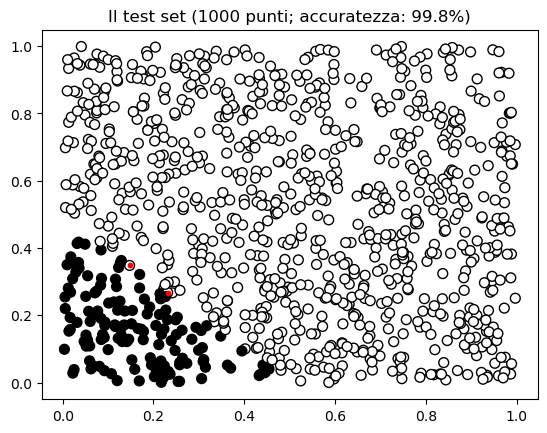

In [3]:
test_size = 1000
data, true_labels = gen_dataset(test_size)

labels = np.zeros(test_size)

for i in range(test_size):
    labels[i] = perceptron.classify(np.asarray([data[i,0], data[i,1]]))

wrong_class = data[labels != true_labels]

plt.figure(2)
plt.clf()
plt.title(f'Il test set ({test_size} punti; accuratezza: {perceptron.evaluate(labels, true_labels):.1f}%)')
plt.scatter(data[:,0],data[:,1], s=50, c=labels, edgecolors='black', cmap='gray')
plt.scatter(wrong_class[:,0],wrong_class[:,1], s=10, c='red')
plt.show()
